# Load utils and store variables

In [30]:
%load_ext autoreload
%autoreload 2
import itertools
import os
import numpy as np
from collections import defaultdict
import operator
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Loading Clusters with queryID list
%store -r resultDict
# add cluster 11 : 100, 143, 112, 20, 152, 95
resultDict[11] = [20,95,100,112,143,152]

print(resultDict)

defaultdict(<class 'list'>, {0: [6, 61, 82, 93, 108, 113, 114, 168, 170, 176, 179, 193], 1: [1, 4, 12, 14, 15, 26, 28, 36, 43, 44, 49, 54, 55, 62, 71, 72, 73, 75, 81, 83, 84, 86, 87, 92, 94, 99, 102, 111, 115, 120, 139, 142, 148, 149, 153, 157, 165, 166, 167, 169, 173, 175, 183, 188, 194, 200], 2: [122, 131, 138, 189, 190], 3: [2, 7, 8, 9, 11, 13, 16, 17, 23, 24, 25, 27, 31, 34, 35, 38, 39, 42, 56, 57, 58, 65, 70, 78, 79, 89, 90, 91, 97, 104, 107, 116, 117, 123, 125, 127, 128, 130, 137, 144, 158, 159, 160, 163, 171, 172, 174, 180, 181, 182, 184, 186, 187, 192], 4: [106], 5: [5, 40, 46, 53, 135, 140], 6: [150], 7: [136, 195], 8: [3, 10, 18, 29, 30, 32, 33, 41, 45, 52, 60, 66, 76, 80, 96, 105, 110, 118, 124, 151, 155, 164, 191, 198], 9: [19, 21, 22, 37, 47, 48, 50, 51, 59, 63, 64, 67, 68, 69, 77, 85, 88, 98, 101, 103, 119, 121, 129, 133, 141, 145, 147, 154, 156, 161, 162, 177, 178, 185, 196, 197], 10: [74, 109, 126, 132, 134, 146, 199], 11: [20, 95, 100, 112, 143, 152]})


In [130]:
# Loading list of clustersb- from k=2 to 11  for 194 queries!!!
%store -r resultDictList
print(len(resultDictList))

10


In [3]:
# Load all combi
%store -r all_combi
print(len(all_combi))

46656


# Load all data per query

In [4]:
# Read all files with results - one per query
def loadQidBM25P(dirPath):
    os.chdir(dirPath)
    qidDict = dict()
    for filename in os.listdir(os.curdir):
        if filename.startswith("trec-eval-all-weights-qid-"):
            queryID = int(filename.split(".")[0].split("-")[-1])
            with open(filename) as f:
                weights2metrics = dict()
                for line in f:
                    if len(line.split("\t"))==2:
                        weight_combo, metrics = line.replace("\n", "").split("\t")
                        weights2metrics[weight_combo] = metrics
                    else:
                        print(line)
            qidDict[queryID] = weights2metrics
    return qidDict

In [5]:
qidDict = loadQidBM25P("/home/muntean/terrier-passage/tfs-per-qid")

In [6]:
print(len(qidDict))
print(qidDict.keys())
# print(len(qidDict[71]))
# print(qidDict[71]["111111"])
# print(qidDict[71]["111345"])

200
dict_keys([25, 103, 171, 15, 177, 18, 112, 62, 37, 198, 134, 68, 163, 193, 138, 29, 34, 164, 78, 128, 8, 89, 92, 61, 95, 197, 195, 153, 35, 140, 85, 57, 101, 47, 176, 5, 139, 31, 65, 99, 48, 50, 53, 82, 26, 90, 94, 187, 51, 137, 69, 148, 58, 106, 175, 91, 143, 196, 28, 86, 49, 2, 16, 64, 127, 132, 93, 54, 100, 125, 133, 179, 141, 189, 80, 130, 3, 191, 178, 17, 24, 122, 116, 39, 87, 20, 158, 46, 126, 108, 23, 167, 6, 73, 129, 102, 149, 14, 27, 88, 190, 155, 63, 160, 194, 135, 124, 71, 36, 168, 12, 174, 156, 119, 97, 19, 21, 180, 67, 104, 59, 43, 1, 84, 200, 184, 186, 146, 98, 52, 185, 13, 131, 60, 152, 162, 120, 118, 166, 42, 157, 154, 161, 105, 74, 199, 4, 7, 182, 165, 72, 70, 83, 30, 151, 145, 96, 77, 79, 40, 142, 45, 111, 38, 172, 150, 114, 76, 144, 170, 55, 136, 66, 32, 10, 115, 181, 173, 169, 9, 11, 123, 192, 44, 75, 109, 107, 159, 41, 117, 121, 56, 22, 33, 110, 81, 113, 183, 147, 188])


# Group queries intro cluster and select trec_eval metric

In [7]:
def getMetricPerQuery(weights2metrics, metric="recall_1000"):
    metricDict = dict()
    metricList = list()
    for weight, metric_str in weights2metrics.items():
        all_metrics = metric_str.split(",")
        for m in all_metrics:
            if m.startswith(metric):
                metricDict[int(weight)] = float(m.split(":")[2])
    return metricDict

In [8]:
cluster2table = defaultdict(list)
for cluster, queries in resultDict.items():
    for qid, metric_str in qidDict.items():
        if qid in queries:
            dictQ = getMetricPerQuery(qidDict[qid], "recall_1000")
            cluster2table[cluster].append(dictQ)   

In [9]:
print(len(cluster2table))
print(cluster2table.keys())
# print(len(cluster2table[1]))
# print(cluster2table[1][1].keys())
# print(len(cluster2table[1][1].keys()))

12
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])


# Group into ONE cluster

In [106]:
all2table = list()
for qid, metric_str in qidDict.items():
    dictQ = getMetricPerQuery(qidDict[qid], "recall_1000")
    all2table.append(dictQ)  

In [107]:
print(len(all2table))

200


# Get Best for query

In [105]:
bestBM25query = []
query2allWeights1Metric = dict()
query2best = dict()
query2classic = dict()
for qid, metric_str in qidDict.items():
    dictQ = getMetricPerQuery(qidDict[qid], "recall_1000")
    query2allWeights1Metric[qid] = dictQ
    if len(dictQ)>0:
        a = sorted(dictQ.items(), key=lambda x: x[1], reverse=True)
        print(qid, a[0])
        query2best[qid] = a[0]
        query2classic[qid] = tuple([111111, dictQ[111111]])
        bestBM25query.append(a[0][1])
print(np.mean(bestBM25query))

%store query2allWeights1Metric
%store query2classic
%store query2best

25 (210314, 0.929204)
103 (100111, 0.568966)
171 (111111, 0.439024)
15 (521313, 0.709497)
177 (111, 0.727273)
18 (101111, 0.607143)
112 (0, 0.0)
62 (101011, 0.650943)
37 (10100, 1.0)
198 (212003, 0.741379)
134 (100001, 0.434783)
68 (130202, 0.577778)
163 (3005, 0.517857)
193 (111001, 0.387097)
138 (130000, 0.666667)
29 (101021, 0.571429)
34 (211213, 0.421687)
164 (213142, 0.358974)
78 (100014, 0.208955)
128 (101001, 0.216667)
8 (1003, 0.2)
89 (21142, 0.634731)
92 (1, 0.266667)
61 (31122, 0.463415)
197 (11113, 0.513274)
195 (100002, 0.416667)
153 (122251, 0.606557)
35 (11022, 0.936842)
140 (1000, 0.25)
85 (110114, 0.194631)
57 (422323, 0.347134)
101 (110111, 0.27381)
47 (500411, 0.963636)
176 (1000, 0.117647)
5 (101000, 0.875)
139 (25, 0.666667)
31 (222313, 0.874172)
65 (212225, 0.71875)
99 (13, 0.460317)
48 (110010, 0.833333)
50 (100111, 0.875)
53 (301111, 0.336364)
82 (102214, 0.462366)
26 (222143, 0.597826)
90 (100101, 0.553191)
94 (102, 0.666667)
187 (101021, 0.888889)
51 (103112, 0

In [128]:
mean = np.mean([y for x,y in query2best.values()])
sd = np.std([y for x,y in query2best.values()])
n = len(query2best)

print(mean, sd, n)

0.511675444444 0.244427238093 198


Unpaired t test results
P value and statistical significance: 

  **The two-tailed P value equals 0.0026 
  By conventional criteria, this difference is considered to be very statistically significant. **

Confidence interval: 

  The mean of Group One minus Group Two equals -0.07505448989900 
  95% confidence interval of this difference: From -0.12364472980357 to -0.02646424999443 

Intermediate values used in calculations: 
  
  t = 3.0368 
  df = 394 
  standard error of difference = 0.025 

Review your data: 

  Group	  Group One  	  Group Two 
  
Mean	0.43662095454500	0.51167544444400

SD	0.24739083988400	0.24442723809300

SEM	0.01758130142769	0.01737068741942

N	198                	198                


# Aggregate results per cluster and get Dataframe after filtering weights bigger or equal than 111111 - Classic BM25

In [10]:
def dsum(dict_list):
    ret = defaultdict(float)
    denominator = len(dict_list)
    for d in dict_list:
        for k, v in d.items():
            ret[k] += v/denominator
    return dict(ret)

In [11]:
def getDF(cluster_dict, biggerThan=111111):
    a = sorted(cluster_dict.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(a, columns=['Weighting', 'Metric'])
    if biggerThan is not None:
        u = float(df.loc[df['Weighting'] == biggerThan]["Metric"])
        return df.loc[df["Metric"] >= u]
    else:
        return df

In [12]:
cluster2df = dict()
cluster2df_all = dict()
index = range(len(all_combi))
for k,v in cluster2table.items():
    cluster_dict = dsum(v)
    cluster2df[k] = getDF(cluster_dict)  
    cluster2df_all[k] = getDF(cluster_dict, None)

In [ ]:
%store cluster2df

# Aggregate result per 1 cluster with all features and find best weights overall

In [ ]:
all_weights = dsum(all2table)
all2df = getDF(all_weights) 

In [117]:
L_111111 = []
L_111112 = []
L_211213 = []
for q, qdict in query2allWeights1Metric.items():
    if len(qdict)>0:
        L_111111.append(qdict[111111])
        L_111112.append(qdict[111112])
        L_211213.append(qdict[211213])

In [124]:
mean = np.mean(L_111112)
sd = np.std(L_111112)
n = len(L_111111)

print(mean, sd, n)

0.455172979798 0.238715566329 198


P value and statistical significance: 
    
  **The two-tailed P value equals 0.4481 
  By conventional criteria, this difference is considered to be not statistically significant. **

Confidence interval: 

  The mean of Group One minus Group Two equals -0.01855202525300 
  95% confidence interval of this difference: From -0.06658474347161 to 0.02948069296561 

Intermediate values used in calculations: 

  t = 0.7593 
  df = 394 
  standard error of difference = 0.024 

Review your data: 

Group	  Group One  	  Group Two  

Mean	0.43662095454500	0.45517297979800

SD	0.24739083988400	0.23871556632900

SEM	0.01758130142769	0.01696477658219

N	198                	198                


# Look at data

In [78]:
averageBest = 0
averageClassic = 0
cluster2weight = dict()
cluster2classic = dict()

for cluster, df in cluster2df.items():
    print("Cluster:" , cluster)
    print()
    print("Max BM25P value", df.head(1))
    print()
    print("B25 classic", df.loc[df['Weighting'] == 111111])
    print()
    print("Number of BM25P bigger than baseline: ", len(df.index))
    print("---------------------------")
    print()
    averageBest += float(df.head(1)['Metric'])
    averageClassic += float(df.loc[df['Weighting'] == 111111]['Metric'])
    cluster2weight[cluster] = (int(df.head(1)['Weighting']),float(df.head(1)['Metric']))
    cluster2classic[cluster] = (111111,float(df.loc[df['Weighting'] == 111111]['Metric']))

Cluster: 0

Max BM25P value    Weighting    Metric
0     213133  0.441124

B25 classic       Weighting    Metric
4347     111111  0.409769

Number of BM25P bigger than baseline:  4348
---------------------------

Cluster: 1

Max BM25P value    Weighting    Metric
0     222225  0.502358

B25 classic        Weighting    Metric
10943     111111  0.454812

Number of BM25P bigger than baseline:  10944
---------------------------

Cluster: 2

Max BM25P value    Weighting    Metric
0     101010  0.436667

B25 classic     Weighting    Metric
36     111111  0.426667

Number of BM25P bigger than baseline:  37
---------------------------

Cluster: 3

Max BM25P value    Weighting    Metric
0     211123  0.494465

B25 classic       Weighting   Metric
5669     111111  0.46148

Number of BM25P bigger than baseline:  5670
---------------------------

Cluster: 4

Max BM25P value    Weighting  Metric
0          0     0.0

B25 classic       Weighting  Metric
9331     111111     0.0

Number of BM25P bigge

In [81]:
print("Average BM25P Best on all clusters: ",averageBest/len(cluster2df))
print("Average BM25P Classic on all clusters: ",averageClassic/len(cluster2df))
print()
print(cluster2weight)
print()
print(cluster2classic)

Average BM25P Best on all clusters:  0.3606110369665862
Average BM25P Classic on all clusters:  0.333735968255406

{0: (213133, 0.44112391666666667), 1: (222225, 0.5023584130434783), 2: (101010, 0.4366666), 3: (211123, 0.4944650555555556), 4: (0, 0.0), 5: (513441, 0.6309345), 6: (100000, 0.25), 7: (400021, 0.308712), 8: (421442, 0.47517729166666667), 9: (312323, 0.4631606666666668), 10: (111112, 0.324734), 11: (0, 0.0)}

{0: (111111, 0.409769), 1: (111111, 0.45481219565217396), 2: (111111, 0.4266666), 3: (111111, 0.46147955555555553), 4: (111111, 0.0), 5: (111111, 0.6248738333333334), 6: (111111, 0.25), 7: (111111, 0.2026515), 8: (111111, 0.466985375), 9: (111111, 0.4480614166666668), 10: (111111, 0.2595321428571429), 11: (111111, 0.0)}


## See progression with 0

In [99]:
def plotWeightInc(best_w, df):
    values = []
    labels = []
    for i in range(1,7):
        current_w = best_w[:i] + "1"*(6-i)
        labels.append(current_w)
        values.append(float(df.loc[df['Weighting'] == int(current_w)]['Metric']) - float(df.loc[df['Weighting'] == int("111111")]['Metric']))
    labels.append(best_w)
    
    print(values)
    print(labels)
    plt.figure()
    plt.plot(values, "o-")
    for i, val in enumerate(values):
        plt.annotate(str(val), (i,val))
    plt.xticks(range(6), labels)
    plt.title(best_w)
    plt.show()

[-0.019370749999999992, -0.019370749999999992, -0.02317866666666668, -0.02317866666666668, -0.007301666666666706, 0.03135491666666668]
['211111', '211111', '213111', '213111', '213131', '213133', '213133']


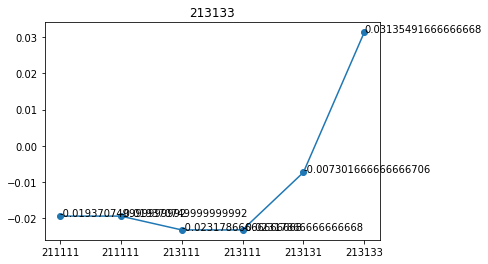

[-0.019164304347826178, -0.05647763043478271, -0.08057884782608699, -0.08471606521739133, -0.08154223913043479, 0.047546217391304324]
['211111', '221111', '222111', '222211', '222221', '222225', '222225']


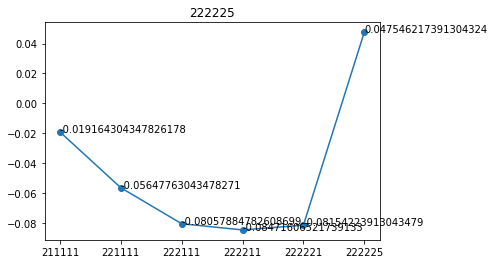

[0.0, -0.016666599999999976, -0.016666599999999976, -0.026666599999999985, -0.026666599999999985, 0.010000000000000009]
['111111', '101111', '101111', '101011', '101011', '101010', '101010']


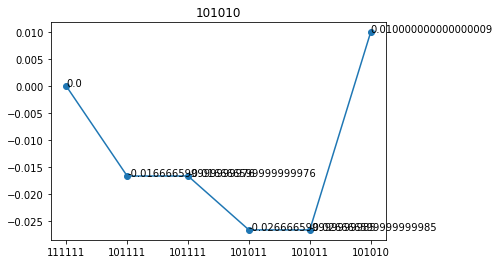

[-0.014704722222222244, -0.014704722222222244, -0.014704722222222244, -0.014704722222222244, -0.014366685185185135, 0.032985500000000056]
['211111', '211111', '211111', '211111', '211121', '211123', '211123']


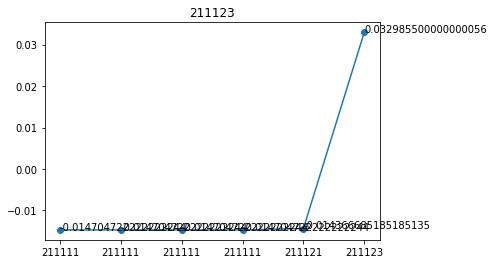

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['011111', '01111', '0111', '011', '01', '0', '0']


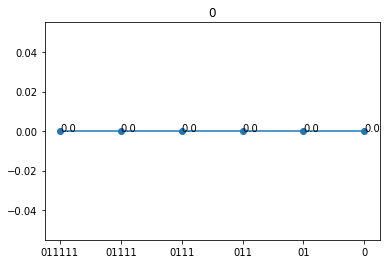

[-0.014772666666666767, -0.014772666666666767, -0.001515166666666734, -0.003030333333333357, 0.006060666666666603, 0.006060666666666603]
['511111', '511111', '513111', '513411', '513441', '513441', '513441']


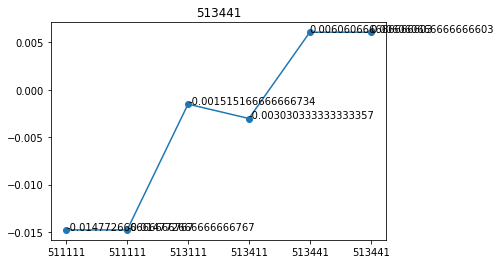

[0.0, -0.25, -0.25, -0.25, -0.25, 0.0]
['111111', '101111', '100111', '100011', '100001', '100000', '100000']


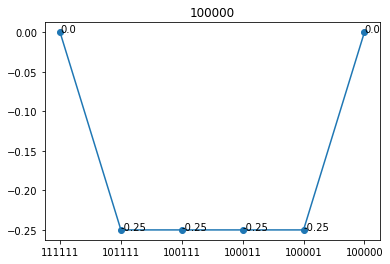

[0.0, 0.030302999999999997, 0.04545449999999998, 0.0757575, 0.10606049999999997, 0.10606049999999997]
['411111', '401111', '400111', '400011', '400021', '400021', '400021']


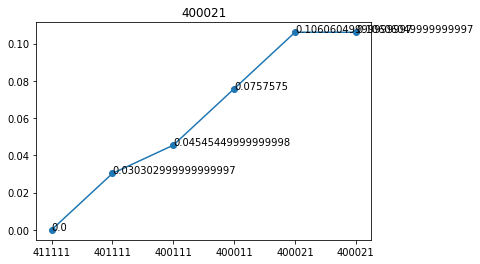

[-0.027299708333333228, -0.033141416666666645, -0.033141416666666645, -0.02648645833333324, -0.004916374999999917, 0.008191916666666688]
['411111', '421111', '421111', '421411', '421441', '421442', '421442']


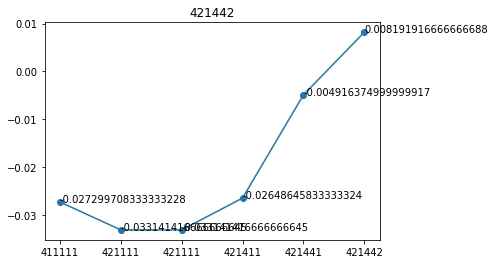

[-0.03170269444444446, -0.03170269444444446, -0.039967444444444555, -0.025054833333333415, -0.008191944444444543, 0.015099249999999953]
['311111', '311111', '312111', '312311', '312321', '312323', '312323']


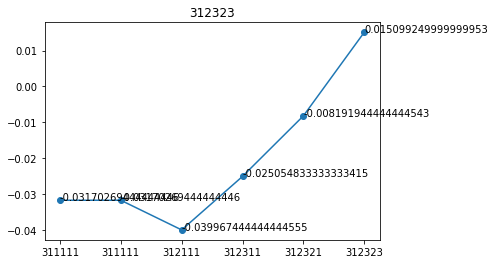

[0.0, 0.0, 0.0, 0.0, 0.0, 0.06520185714285714]
['111111', '111111', '111111', '111111', '111111', '111112', '111112']


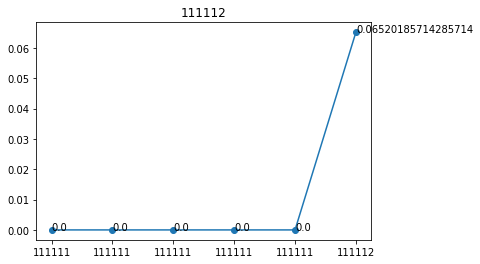

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['011111', '01111', '0111', '011', '01', '0', '0']


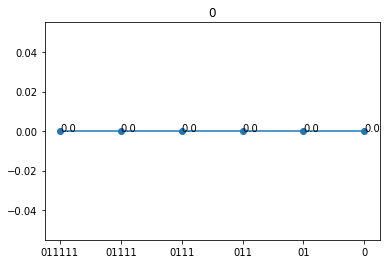

In [100]:
for cluster, df in cluster2df_all.items():
    best_w = str(cluster2weight[cluster][0])
    plotWeightInc(best_w, df)

In [88]:
# Select random weight from the available values! 

best_weights = [x for x,y  in cluster2weight.values()]
print(best_weights)
best_weights = [111111 if x==0 else x for x in best_weights]
print(best_weights)

random_mean_100 = 0
for i in range(100):
    vals = list()
    for cluster, df in cluster2df_all.items():
        weight = np.random.choice(best_weights)
        vals.append(float(df.loc[df['Weighting'] == int(weight)]['Metric']))
        #print(cluster, weight, float(df.loc[df['Weighting'] == int(weight)]['Metric']))
    random_mean_100 += np.mean(vals)
print()
print("Average BM25P Random on all clusters: ", random_mean_100/100)
print("Average BM25P Best on all clusters: ",averageBest/len(cluster2df))
print("Average BM25P Classic on all clusters: ",averageClassic/len(cluster2df))

[213133, 222225, 101010, 211123, 0, 513441, 100000, 400021, 421442, 312323, 111112, 0]
[213133, 222225, 101010, 211123, 111111, 513441, 100000, 400021, 421442, 312323, 111112, 111111]

Average BM25P Random on all clusters:  0.308800876163
Average BM25P Best on all clusters:  0.3606110369665862
Average BM25P Classic on all clusters:  0.333735968255406
